# PANDAS PROJECT

#### The objective of the project consists of the validation of two hypotheses raised from the Attacks.csv dataset,  which contains a record of shark attacks around the world. Before continuing, please, read Readme file in this repo.

#### We have raised two hypotheses to validate: 
#### 1.- Australia is the country that suffered the most shark attacks and deaths since 1900 by cosatline length.
#### 2.-  Surfing is the sport in which the most shark attacks have been recorded since 1900 in the USA and Australia.

####  First of all, after preliminary analyzing the file we found that some columns do not have enough data to carry out a sufficiently evidenced analysis. As an example, the column "Species" is not used since the number of empty cells is over the 30% of the file.

####  We will make use of the following columns to be able to conclude:
####  - Year: > 1900
#### - Country: Australia, USA and other countries
#### - Activity: Surfing, diving, swimming and fishing
####  - Fatal (Y/N): Y/N


#####  Firstly, we are importing the libraries...

In [1]:
import os
import pandas as pd
import numpy as np
import re
import datetime as dt
import matplotlib.pyplot as plt

##### and adding the dataframe from attacks.csv.
(source: https://www.kaggle.com/teajay/global-shark-attacks?select=attacks.csv)

In [2]:

df = pd.read_csv('../input/attacks.csv', encoding = 'latin-1') 

##### This is the dataframe...


In [3]:
display(df)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### We must clean and process the data to be able to conclude...

# Processing the data


##### We effect an inicial processing...

In [4]:
#Displaying the columns in the dataframe
df.columns

#Renaming some columns to express their content
df.rename(columns ={"Case Number": "Case_Number",
                    "Fatal (Y/N)": "Fatal_(Y/N)",
                    "Species ":"Species",
                    "Investigator or Source":"Investigator_or_Source",
                    "href formula": "PDF_Link",
                    "href": "PDF_Link_1",
                    "Case Number.1":"Case_Number1",
                    "Case Number.2":"Case_Number_2",
                    "original order": "Original_Order"
                       } , inplace = True)

#Removing spaces from begining and end for every column
df.columns = df.columns.str.strip()

#Dropping all duplicates considering all columns
df.drop_duplicates(subset=list(df.columns))

#Transforming None types into "Not Available" for every column
df.fillna("Not Available", inplace=True)

##### We create a new DF to avoid overwriting of the original one

In [5]:
hypo = df

### "Year"column

###### We start by analyzing "Year" column in order to clean wrong values. Below, we display all values for this column. We can identify several uncorrect values.

In [6]:
pd.unique(hypo["Year"])

array([2018.0, 2017.0, 'Not Available', 2016.0, 2015.0, 2014.0, 2013.0,
       2012.0, 2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0,
       2004.0, 2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0,
       1996.0, 1995.0, 1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0,
       1989.0, 1969.0, 1988.0, 1987.0, 1986.0, 1985.0, 1983.0, 1982.0,
       1981.0, 1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0,
       1973.0, 1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1965.0,
       1964.0, 1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0,
       1956.0, 1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0,
       1948.0, 1848.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0,
       1941.0, 1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0,
       1933.0, 1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0,
       1925.0, 1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0,
       1917.0, 1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0,
     

##### We effect a filter on original df to try to fix them. Unexpectedly,this values are correct so we will focus on "0" cases. 
##### We observed "Date" column also contains the year. We import this column into "hypo" df...

In [7]:
display(df[df.Year.isin([5, 77, 500])])
hypo["Date"] = df["Date"]

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,PDF_Link,PDF_Link_1,Case_Number1,Case_Number_2,Original_Order,Unnamed: 22,Unnamed: 23
6174,0500.00.00,Circa 500 A.D.,500,Unprovoked,MEXICO,Not Available,Not Available,Not Available,male,M,...,Not Available,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,129,Not Available,Not Available
6175,0077.00.00,77 A.D.,77,Unprovoked,Not Available,Ionian Sea,Not Available,Sponge diving,males,M,...,Not Available,Perils mentioned by Pliny the Elder (23 A.D. t...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,0077.00.00,128,Not Available,Not Available
6176,0005.00.00,Ca. 5 A.D.,5,Unprovoked,AUSTRALIA,New South Wales,Bondi,Not Available,male,M,...,Not Available,Waverly Library,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,0005.00.00,127,Not Available,Not Available


##### and append a column "Date_match" with the years extracted from "Date"

In [8]:
x = []
for l in hypo["Date"]:
    x.append(str(l))

z =[]
for l in x:
    match = re.match(r'.*([1-3][0-9]{3})', l)
    if match is not None:
        z.append(match[1])
    else:
        z.append("no match")
hypo["Date_match"] = z
hypo.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator_or_Source,pdf,PDF_Link,PDF_Link_1,Case_Number1,Case_Number_2,Original_Order,Unnamed: 22,Unnamed: 23,Date_match
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,Not Available,Not Available,2018
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,Not Available,Not Available,2018
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,Not Available,Not Available,2018
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,Not Available,Not Available,2018
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,Not Available,Not Available,2018


#####  We import the year from "Date" for "0" values in "Year". Not Available rows are empty and "no match" rows contain years before 1000 so we exclude them.

In [9]:
hypo["Year_Date"] = np.where(hypo["Year"] == 0, hypo["Date_match"], hypo["Year"])

#Deleting "Not Available" and "no match" rows
hypo = hypo.drop(hypo[(hypo['Year_Date']=='Not Available') | (hypo['Year_Date'] =='no match')].index)

# Converting into int "Year_Date" column 
x = []
for h in hypo["Year_Date"]:
    x.append(int(h))
hypo["Year_Date"] = x

##### Since our hypothesis to be validated focuses on the cases that occurred since 1900, we apply a filter from this date in the column "Year"

In [10]:
hypo =hypo[hypo['Year_Date'] > 1900]

### "Country"column
##### Afterwards, we focus on "Country". This column contains some misstatements. By printing the top25 countries by attacks, we are proving that the impact of misstatements is residual.

In [11]:
print(pd.unique(hypo["Country"]))
hypo.groupby(by="Country").count().sort_values("Year_Date", ascending=False).head(25)

['USA' 'AUSTRALIA' 'MEXICO' 'BRAZIL' 'ENGLAND' 'SOUTH AFRICA' 'THAILAND'
 'COSTA RICA' 'MALDIVES' 'BAHAMAS' 'NEW CALEDONIA' 'ECUADOR' 'MALAYSIA'
 'LIBYA' 'Not Available' 'CUBA' 'MAURITIUS' 'NEW ZEALAND' 'SPAIN' 'SAMOA'
 'SOLOMON ISLANDS' 'JAPAN' 'EGYPT' 'ST HELENA, British overseas territory'
 'COMOROS' 'REUNION' 'FRENCH POLYNESIA' 'UNITED KINGDOM'
 'UNITED ARAB EMIRATES' 'PHILIPPINES' 'INDONESIA' 'CHINA' 'COLUMBIA'
 'CAPE VERDE' 'Fiji' 'DOMINICAN REPUBLIC' 'CAYMAN ISLANDS' 'ARUBA'
 'MOZAMBIQUE' 'FIJI' 'PUERTO RICO' 'ITALY' 'ATLANTIC OCEAN' 'GREECE'
 'ST. MARTIN' 'FRANCE' 'PAPUA NEW GUINEA' 'TRINIDAD & TOBAGO' 'KIRIBATI'
 'ISRAEL' 'DIEGO GARCIA' 'TAIWAN' 'JAMAICA' 'PALESTINIAN TERRITORIES'
 'GUAM' 'SEYCHELLES' 'BELIZE' 'NIGERIA' 'TONGA' 'SCOTLAND' 'CANADA'
 'CROATIA' 'SAUDI ARABIA' 'CHILE' 'ANTIGUA' 'KENYA' 'RUSSIA'
 'TURKS & CAICOS' 'UNITED ARAB EMIRATES (UAE)' 'AZORES' 'SOUTH KOREA'
 'MALTA' 'VIETNAM' 'MADAGASCAR' 'PANAMA' 'SOMALIA' 'NEVIS'
 'BRITISH VIRGIN ISLANDS' 'NORWAY' 'SENEGAL

,Case_Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,...,pdf,PDF_Link,PDF_Link_1,Case_Number1,Case_Number_2,Original_Order,Unnamed: 22,Unnamed: 23,Date_match,Year_Date
Country,,,,,,,,,,,,,,,,,,,,,
USA,2092,2092,2092,2092,2092,2092,2092,2092,2092,2092,...,2092,2092,2092,2092,2092,2092,2092,2092,2092,2092
AUSTRALIA,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,...,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190
SOUTH AFRICA,552,552,552,552,552,552,552,552,552,552,...,552,552,552,552,552,552,552,552,552,552
PAPUA NEW GUINEA,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
BRAZIL,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108
BAHAMAS,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
NEW ZEALAND,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
MEXICO,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
ITALY,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62


### "Activity" column
##### We extract the main activities from this column by Regex:
- Surf,
- Swimming, 
- Fishing an 
- Diving
##### We create a new column "Activity_new" to store  and filter by them.

In [12]:
#Extrating Surf, Swimming, fishing an diving from "Activity" and creating a new column "Activity_new"
x= []

for h in hypo["Activity"]:
    y =(re.search(r"swim|fish|div|surf|paddle|", h, re.IGNORECASE))
    x.append(y.group().lower())

#Filtering Surf, Swimming, fishing an diving        
hypo["Activity_new"] = x     
hypo =hypo[(hypo.Activity_new == "surf")|
      (hypo.Activity_new == "fish")|
      (hypo.Activity_new == "div")|
      (hypo.Activity_new == "swim")|
      (hypo.Activity_new == "paddle")]

#Replacing values 
hypo["Activity_new"] = hypo["Activity_new"].replace("div","Diving") 
hypo["Activity_new"] = hypo["Activity_new"].replace("fish","Fishing") 
hypo["Activity_new"] = hypo["Activity_new"].replace("surf","Surfing")
hypo["Activity_new"] = hypo["Activity_new"].replace("paddle","Surfing")
hypo["Activity_new"] = hypo["Activity_new"].replace("swim","Swimming") 

hypo.groupby("Activity_new").count()
                                                                                

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,pdf,PDF_Link,PDF_Link_1,Case_Number1,Case_Number_2,Original_Order,Unnamed: 22,Unnamed: 23,Date_match,Year_Date
Activity_new,,,,,,,,,,,,,,,,,,,,,
Diving,213,213,213,213,213,213,213,213,213,213,...,213,213,213,213,213,213,213,213,213,213
Fishing,559,559,559,559,559,559,559,559,559,559,...,559,559,559,559,559,559,559,559,559,559
Surfing,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,...,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079
Swimming,941,941,941,941,941,941,941,941,941,941,...,941,941,941,941,941,941,941,941,941,941


### "Fatal" column
##### We correct the misstatements. Otherwise, 193 cases do not have a determined final (injuried or dead). This supposes less than 10% of the data.

In [13]:
#Deleting space in " N"
hypo["Fatal_(Y/N)"] = hypo["Fatal_(Y/N)"].str.strip()

hypo.groupby("Fatal_(Y/N)").count()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,PDF_Link,PDF_Link_1,Case_Number1,Case_Number_2,Original_Order,Unnamed: 22,Unnamed: 23,Date_match,Year_Date,Activity_new
Fatal_(Y/N),,,,,,,,,,,,,,,,,,,,,
N,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,...,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117
Not Available,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177
UNKNOWN,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Y,482,482,482,482,482,482,482,482,482,482,...,482,482,482,482,482,482,482,482,482,482


# Once the DataSet is processed, we begin with our analysis

### Hypothesis 1 -->Australia is the country that suffered the most shark attacks and deaths since 1900 by cosatline length.

#### To refute the hypothesis we need to draw conclusions about some other premises. 
#### We calculate the countries that suffered the highest number of attacks and deaths in the period.

# TOP5 ATTACKS BY COUNTRY

,Case_Number
Country,
USA,1141
AUSTRALIA,608
SOUTH AFRICA,282
BRAZIL,76
PAPUA NEW GUINEA,51


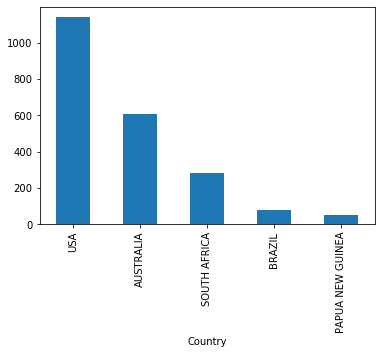

In [14]:
top5_attacks = hypo.groupby(by="Country").count().sort_values("Year_Date", ascending = False).head(5)
display(top5_attacks[["Case_Number"]])
display(top5_attacks["Date"].plot.bar())

#  TOP5 DEATHS BY COUNTRY

,Case_Number
Country,
AUSTRALIA,107
USA,65
SOUTH AFRICA,48
BRAZIL,26
PAPUA NEW GUINEA,23


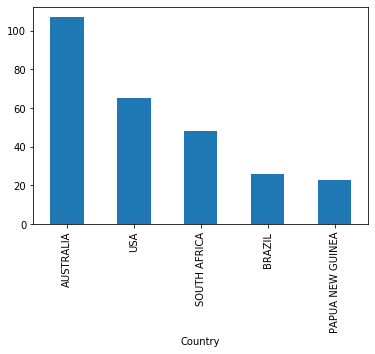

In [15]:
top5_deaths = hypo[(hypo['Fatal_(Y/N)'] == 'Y')]
top5_deaths = top5_deaths.groupby(by ="Country").count().sort_values("Year_Date", ascending = False).head(5)
display(top5_deaths[["Case_Number"]])
display(top5_deaths["Date"].plot.bar())

##### We observed that top5 countries by attack and death since 1900 are: 
- Austalia
- USA
- South Africa
- Brazil
- Papua New Guinea

##### We create a new DataFrame containing this top5 countries.

In [16]:
top5_countries  = hypo[(hypo['Country'] == "USA")|
            (hypo['Country'] == "AUSTRALIA")|
            (hypo['Country'] == "SOUTH AFRICA")|
            (hypo['Country'] == "BRAZIL")|
            (hypo['Country'] == "PAPUA NEW GUINEA")]

###### Finally, we check the validity of our hypothesis...

# TOP5 ATTACKS AND DEATHS BY COASTLINE

##### We create a new DataFrame with coastline kilometers for top 5 countries.
Source: World Resources Institute (https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_longitud_de_costa)


In [17]:
coastline = pd.DataFrame({"Coastline_Km": [19924, 25148, 2798, 7491, 5152]},index =['USA','AUSTRALIA','SOUTH AFRICA','BRAZIL', 'PAPUA NEW GUINEA']) 
coastline = coastline.reset_index()
coastline.rename(columns ={"index": "Country"}, inplace = True)
coastline.set_index("Country")                     
coastline = pd.merge(coastline,top5_attacks[["Case_Number"]], how='left', on='Country')
coastline.rename(columns ={"Case_Number": "Attack_Cases"}, inplace = True)
coastline = pd.merge(coastline,top5_deaths[["Case_Number"]], how='left', on='Country')
coastline.rename(columns ={"Case_Number": "Death_Cases"}, inplace = True)
coastline['Attacks_by_1000km'] = (coastline['Attack_Cases']/(coastline['Coastline_Km']/1000))
coastline['Deaths_by_1000km'] = (coastline['Death_Cases']/(coastline['Coastline_Km']/1000))
coastline.set_index('Country')
display(coastline.sort_values("Attacks_by_1000km", ascending = False))

,Country,Coastline_Km,Attack_Cases,Death_Cases,Attacks_by_1000km,Deaths_by_1000km
2,SOUTH AFRICA,2798,282,48,100.786276,17.155111
0,USA,19924,1141,65,57.267617,3.262397
1,AUSTRALIA,25148,608,107,24.176873,4.254812
3,BRAZIL,7491,76,26,10.145508,3.470832
4,PAPUA NEW GUINEA,5152,51,23,9.899068,4.464286


#### We conclude that our hypothesis is wrong:
## The country that suffered the most shark attacks, and deaths, per kilometer of coastline since 1900 is SOUTH AFRICA. 

### Hypothesis 2 -->Surfing is the sport in which the most shark attacks have been recorded since 1900 in the USA and Australia.

#### We check which sports suffered the highest number of attacks and deaths in the period. A

# ATTACKS BY ACTIVITY IN TOP 5 COUNTRIES

,Case_Number,%
Activity_new,,
Surfing,998,46.246525
Swimming,664,30.769231
Fishing,368,17.052827
Diving,128,5.931418


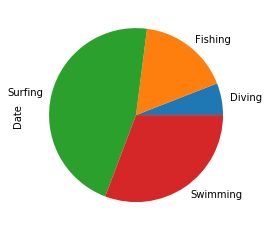

In [18]:
top5_activity = top5_countries.groupby("Activity_new").count().sort_values("Activity_new")
top5_activity['%'] = (top5_activity['Case_Number'] / top5_activity['Case_Number'].sum()) * 100
display(top5_activity[["Case_Number","%"]].sort_values("%", ascending=False))
display(top5_activity["Date"].plot.pie())

# ATTACKS BY ACTIVITY IN AUSTRALIA

,Case_Number,%
Activity,,
Surfing,195,42.116631
Swimming,133,28.725702
Fishing,97,20.950324
Diving,28,6.047516
Swimming,10,2.159827


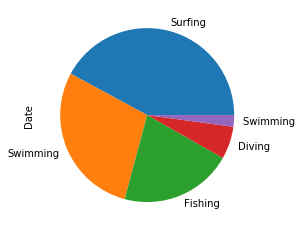

In [19]:
australia_attacks = top5_countries[top5_countries['Country'] == "AUSTRALIA"]
australia_attacks = australia_attacks.groupby(by="Activity").count().sort_values("Year_Date", ascending = False).head(5)
australia_attacks['%'] = (australia_attacks['Case_Number'] / australia_attacks['Case_Number'].sum()) * 100
display(australia_attacks[["Case_Number","%"]].sort_values("%", ascending=False))
display(australia_attacks["Date"].plot.pie())

# ATTACKS BY ACTIVITY IN USA

,Case_Number,%
Activity,,
Surfing,562,56.882591
Swimming,285,28.846154
Fishing,100,10.121457
Diving,26,2.631579
Swimming,15,1.518219


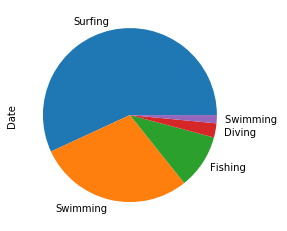

In [20]:
usa_attacks = top5_countries[(top5_countries['Country'] == "USA")]
usa_attacks = usa_attacks.groupby(by="Activity").count().sort_values("Year_Date", ascending = False).head(5)
usa_attacks['%'] = (usa_attacks['Case_Number'] / usa_attacks['Case_Number'].sum()) * 100
display(usa_attacks[["Case_Number","%"]].sort_values("%", ascending=False))
display(usa_attacks["Date"].plot.pie())

#### We have validated our hypothesis:
## Surfing is the sport in which the most shark attacks have been recorded since 1900 in the USA and Australia.